# Independent investigation of TMDB dataset:
First let's read/convert our CSV to a Pandas dataframe:

In [143]:
# I prefer to import each library at the beginning of the Notebook:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [144]:
movie_data = pd.read_csv('tmdb-movies.csv')

movie_data.head(5)
#printing only the first 5 rows:

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## By taking a quick snapshot of the data there are a few questions I would like to answer:
**What kinds of properties are associated with movies that have high revenues?**
- Is there a positive correlation between the amount of money budgeted and the amount of revenue the movie makes?
- is there a positive correlation between the rating and the revenue?
- What is the relation between director and revenue?
- How about popularity and revenue?

For starters, I would like to slice this data to create two data sets, the most current year 2015 (our primary investigation set) and 2014 (for comparison).

This will give me a better snapshot of the data to investigate.

In [310]:
movies_in_2015 = movie_data[movie_data['release_year']==2015]
movies_in_2014 = movie_data[movie_data['release_year']==2014]

### Is there a positive correlation between the amount of money budgeted and the rating?


In [311]:
# Let's start by defining functions to standardize our data:

def standardize_column(column):
    return (column-column.mean()) / column.std(ddof=0)

def standardize(df):
    return df.apply(standardize_column)

# And this function will help us see a correlation between two sets of variables:

def correlation(x,y):
    xstd = (x-x.mean()) / x.std(ddof=0)
    ystd = (y-y.mean()) / y.std(ddof=0)
    return (xstd*ystd).mean()

def standardize_rows(df):
    mean_diffs = df.sub(df.mean(axis='columns'), axis='index')
    return mean_diffs.div(df.std(axis='columns',ddof=0), axis='index')

In [312]:
pop_bdgt_2015 = movies_in_2015[['budget','popularity']]
# I noticed after printing this dataset, that there were lot's of movies with "0" for the budget.

# That doesn't seem right, because it's impossible for a movie not to have a budget, so let's clean up the data and remove those:
pop_bdgt_2015 = pop_bdgt_2015[pop_bdgt_2015['budget']>0]

# Now we see only the movies with data for budget:
print pop_bdgt_2015.head()

      budget  popularity
0  150000000   32.985763
1  150000000   28.419936
2  110000000   13.112507
3  200000000   11.173104
4  190000000    9.335014


In [324]:
# now let's standardize our columns:
standardized_data_2015 = standardize(popluarity_budget_2015)

standardized_data_2015.head()

,budget,popularity
0,2.313175,8.814597
1,2.313175,7.502616
2,1.500294,3.104059
3,3.329277,2.546776
4,3.126057,2.018605


By creating a scatter plot we can see a positive correlation:

Populating the interactive namespace from numpy and matplotlib


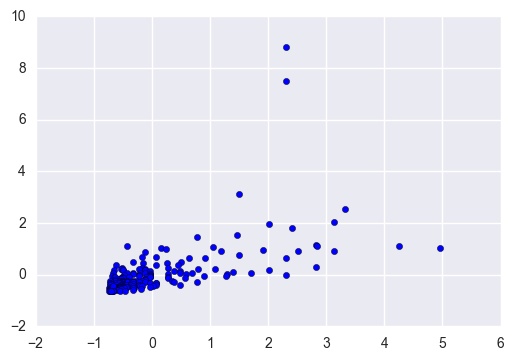

In [329]:
%pylab inline
plt.scatter(standardized_data_2015['budget'], standardized_data_2015['popularity'])

**We can also use Pearson's R to see if there is a positive correlation:**

In [330]:
%pylab inline
correlation(pop_bdgt_2015['budget'], pop_bdgt_2015['popularity'])

Populating the interactive namespace from numpy and matplotlib


0.60559235769755737

### It appears there is a postive correlation between budget and popularity
however, this does not imply causation as there are many other variables that can contribute.

### Is there a positive correlation between the genre and the revenue?

### What is the relation between budget and runtime?

### Do the actors have an influence on popularity rating?

### Does the director have an influence on popularity?
